In [37]:
from sklearn import datasets

In [38]:
iris = datasets.load_iris()

In [4]:
# iris.data

In [39]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
inputs = iris.data[0:100]

In [9]:
len(inputs)

100

In [10]:
inputs.shape

(100, 4)

In [11]:
outputs = iris.target[0:100]
outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
len(outputs)

100

In [13]:
outputs.shape

(100,)

In [14]:
outputs = outputs.reshape(-1, 1)
outputs.shape

(100, 1)

In [22]:
import numpy as np

def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

weights0 = 2 * np.random.random((4, 5)) - 1
#                                num input , num neurons in hidden layers
weights1 = 2 * np.random.random((5,1)) - 1
#                 num neurons in hidden layers, num output


In [23]:
weights0

array([[-0.86526517, -0.9061959 , -0.97627064, -0.37391107,  0.98507167],
       [ 0.77598451, -0.33067346,  0.72447835, -0.80377176, -0.12203288],
       [-0.7565182 , -0.96785657,  0.18130535,  0.38960064,  0.45477114],
       [-0.56250139, -0.06594422, -0.02551377, -0.85371259, -0.26217151]])

In [24]:
epochs = 10000
learning_rate = 0.01

error = []

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
  
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)
  
  derivative_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output
  
  weights1T = weights1.T
  delta_output_weight = delta_output.dot(weights1T)
  delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
  
  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights1 = weights1 + (input_x_delta1 * learning_rate)
  
  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights0 = weights0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.49953060979036723
Epoch: 1001 Error: 0.03600249891766356
Epoch: 2001 Error: 0.024178843863724295
Epoch: 3001 Error: 0.019331579405373046
Epoch: 4001 Error: 0.01654154624022378
Epoch: 5001 Error: 0.014677307308002296
Epoch: 6001 Error: 0.013320963252812203
Epoch: 7001 Error: 0.012278043911191257
Epoch: 8001 Error: 0.011444345321985077
Epoch: 9001 Error: 0.010758402310839634


In [26]:
error

[0.49953060979036723,
 0.03600249891766356,
 0.024178843863724295,
 0.019331579405373046,
 0.01654154624022378,
 0.014677307308002296,
 0.013320963252812203,
 0.012278043911191257,
 0.011444345321985077,
 0.010758402310839634]

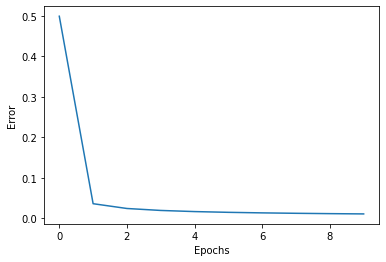

In [25]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(error)

In [27]:
def calculate_output(instance):
  hidden_layer = sigmoid(np.dot(instance, weights0))
  output_layer = sigmoid(np.dot(hidden_layer, weights1))
  return output_layer[0]

In [28]:
inputs[0], outputs[0]

(array([5.1, 3.5, 1.4, 0.2]), array([0]))

In [29]:
round(calculate_output(inputs[0]))

0

In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
iris.target_names[int(round(calculate_output(inputs[0])))]

'setosa'

In [32]:
inputs[99], outputs[99]

(array([5.7, 2.8, 4.1, 1.3]), array([1]))

In [33]:
iris.target_names[int(round(calculate_output(inputs[99])))]

'versicolor'

In [44]:
# Graph
import pandas as pd

df1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
df2 = pd.DataFrame(data=iris.target, columns=["class"])
df2

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [47]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [49]:
df3 = pd.concat([df1, df2], axis=1)
df3

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


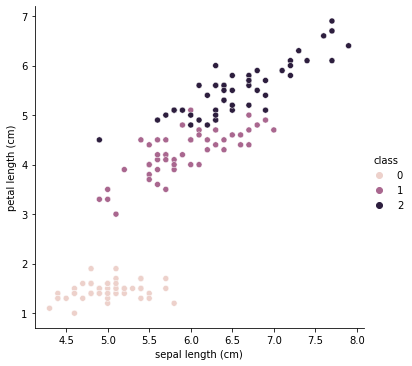

In [51]:
import seaborn as sns

sns.relplot(x="sepal length (cm)", y="petal length (cm)", data = df3, hue = "class")